In [5]:
import sys
assert sys.version_info >=(3,5)

import sklearn
assert sklearn.__version__ >="0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID="end_to_end_project"

IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import os
import tarfile
import urllib

DOWNLOAD_ROOT="http://jth2405.dothome.co.kr/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL= DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()

In [46]:
print("2017250045정태환")
housing=load_housing_data()
housing.head(7)

2017250045정태환


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [10]:
print("2017250045정태환")
housing.info()

2017250045정태환
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
print("2017250045정태환")
housing.describe()

2017250045정태환


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


2017250045정태환
Saving figure 01_attribute_histogram_plots


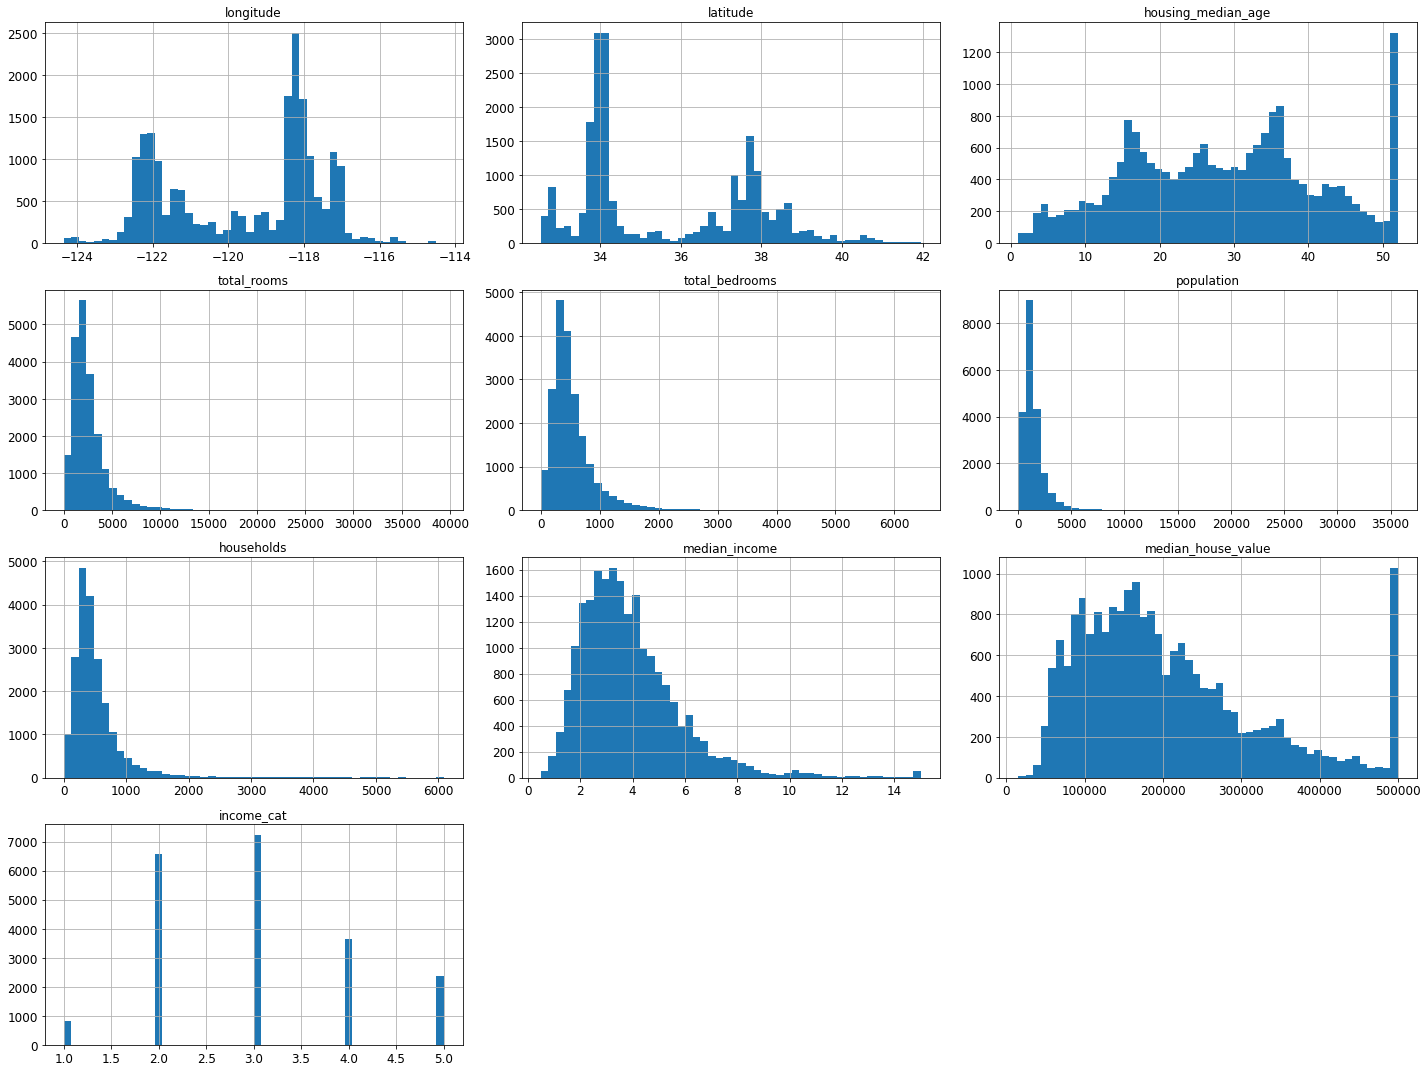

In [38]:
print("2017250045정태환")
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("01_attribute_histogram_plots")
plt.show()

In [47]:
np.random.seed(42)

In [18]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
print("2017250045정태환")
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

2017250045정태환
16512 train + 4128 test


In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)
print("2017250045정태환")
test_set.head()

2017250045정태환


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [22]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)

In [24]:
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)

2017250045정태환
Saving figure 02_bad_visualization_plot


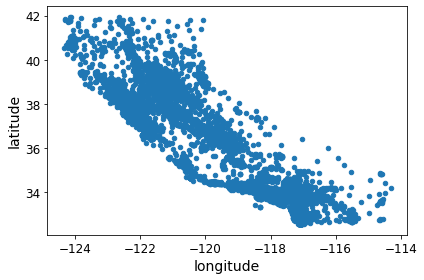

In [39]:
print("2017250045정태환")
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("02_bad_visualization_plot")

2017250045정태환
Saving figure 03_better_visualization_plot


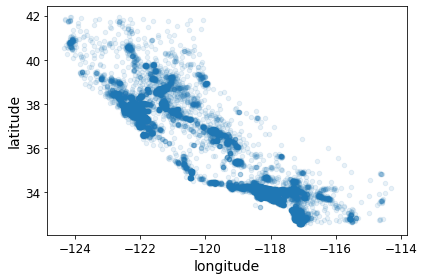

In [40]:
print("2017250045정태환")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("03_better_visualization_plot")

2017250045정태환
Saving figure 04_housing_prices_scatterplot


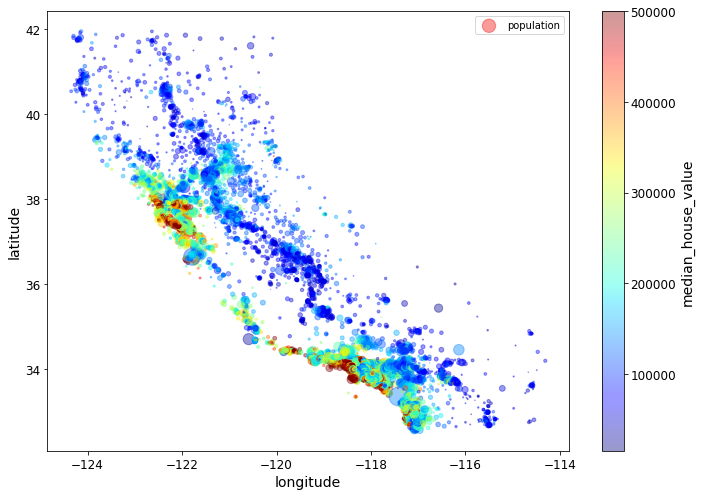

In [48]:
print("2017250045정태환")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=housing["population"]/100, label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
save_fig("04_housing_prices_scatterplot") 
plt.show()

In [35]:
print("2017250045정태환")
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

2017250045정태환


median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

2017250045정태환
Saving figure 06_scatter_matrix_plot


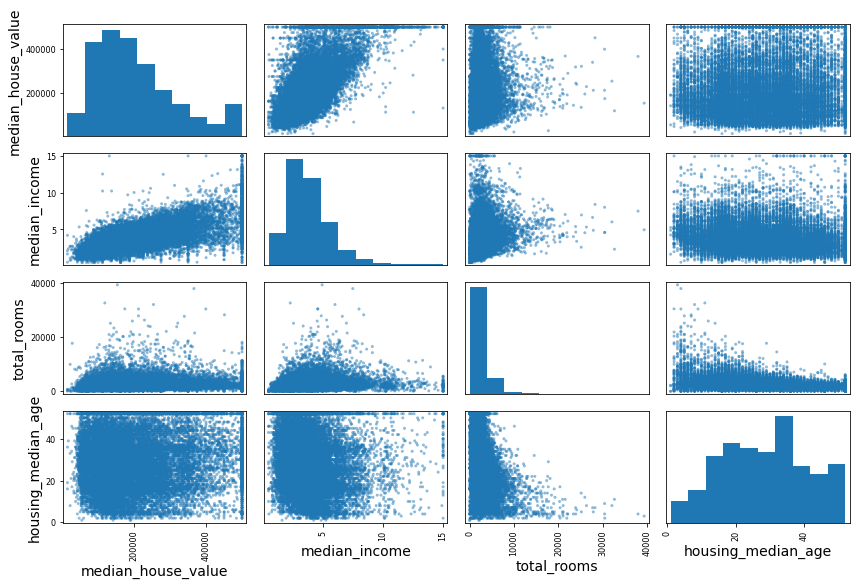

In [41]:
from pandas.plotting import scatter_matrix
print("2017250045정태환")
attributes=["median_house_value", "median_income", "total_rooms",
           "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("06_scatter_matrix_plot")
plt.show()

2017250045정태환
Saving figure 07_income_vs_house_value_scatterplot


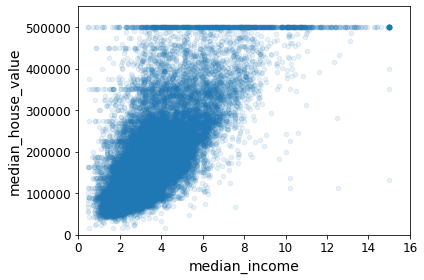

In [42]:
print("2017250045정태환")
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("07_income_vs_house_value_scatterplot") 
plt.show()


CORR_MATRIX AGAIN:

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


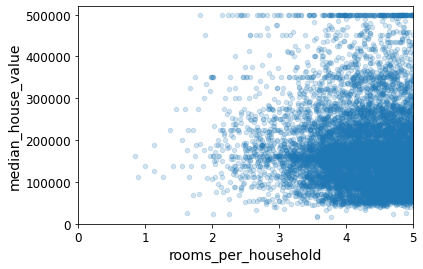

In [45]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"] 

corr_matrix = housing.corr() 
print("\nCORR_MATRIX AGAIN:\n") 
print(corr_matrix["median_house_value"].sort_values(ascending=False)) 

housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2) 
plt.axis([0, 5, 0, 520000])
plt.show()